<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Objectives" data-toc-modified-id="Objectives-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Objectives</a></span></li><li><span><a href="#Ames-Housing-Data" data-toc-modified-id="Ames-Housing-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Ames Housing Data</a></span></li><li><span><a href="#Identify-Good-Candidates-for-Log-Transformation" data-toc-modified-id="Identify-Good-Candidates-for-Log-Transformation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Identify Good Candidates for Log Transformation</a></span><ul class="toc-item"><li><span><a href="#Plot-Log-Transformed-Versions-of-Features" data-toc-modified-id="Plot-Log-Transformed-Versions-of-Features-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Plot Log Transformed Versions of Features</a></span></li></ul></li><li><span><a href="#Build-a-Model-with-Log-Transformed-Features-and-Target" data-toc-modified-id="Build-a-Model-with-Log-Transformed-Features-and-Target-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Build a Model with Log-Transformed Features and Target</a></span><ul class="toc-item"><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Data Preparation</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Modeling</a></span></li><li><span><a href="#Model-Evaluation-and-Interpretation" data-toc-modified-id="Model-Evaluation-and-Interpretation-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Model Evaluation and Interpretation</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

# Log Transformations - Lab

## Introduction

It's time to practice some logarithmic transformations on the Ames Housing dataset!

## Objectives

You will be able to:

- Determine if a log transformation would be useful for a specific model or set of data
- Apply log transformations to independent and dependent variables in linear regression
- Interpret the coefficients of variables that have been transformed using a log transformation

## Ames Housing Data

Below we load the numeric features from the Ames Housing dataset into a dataframe. We also drop any rows with missing data.

In [1]:
# Run this cell without changes
import pandas as pd
ames = pd.read_csv("ames.csv", index_col=0)
ames = ames.select_dtypes("number")
ames.dropna(inplace=True)
ames

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


## Identify Good Candidates for Log Transformation

Below we plot each of the potential numeric features against `SalePrice`:

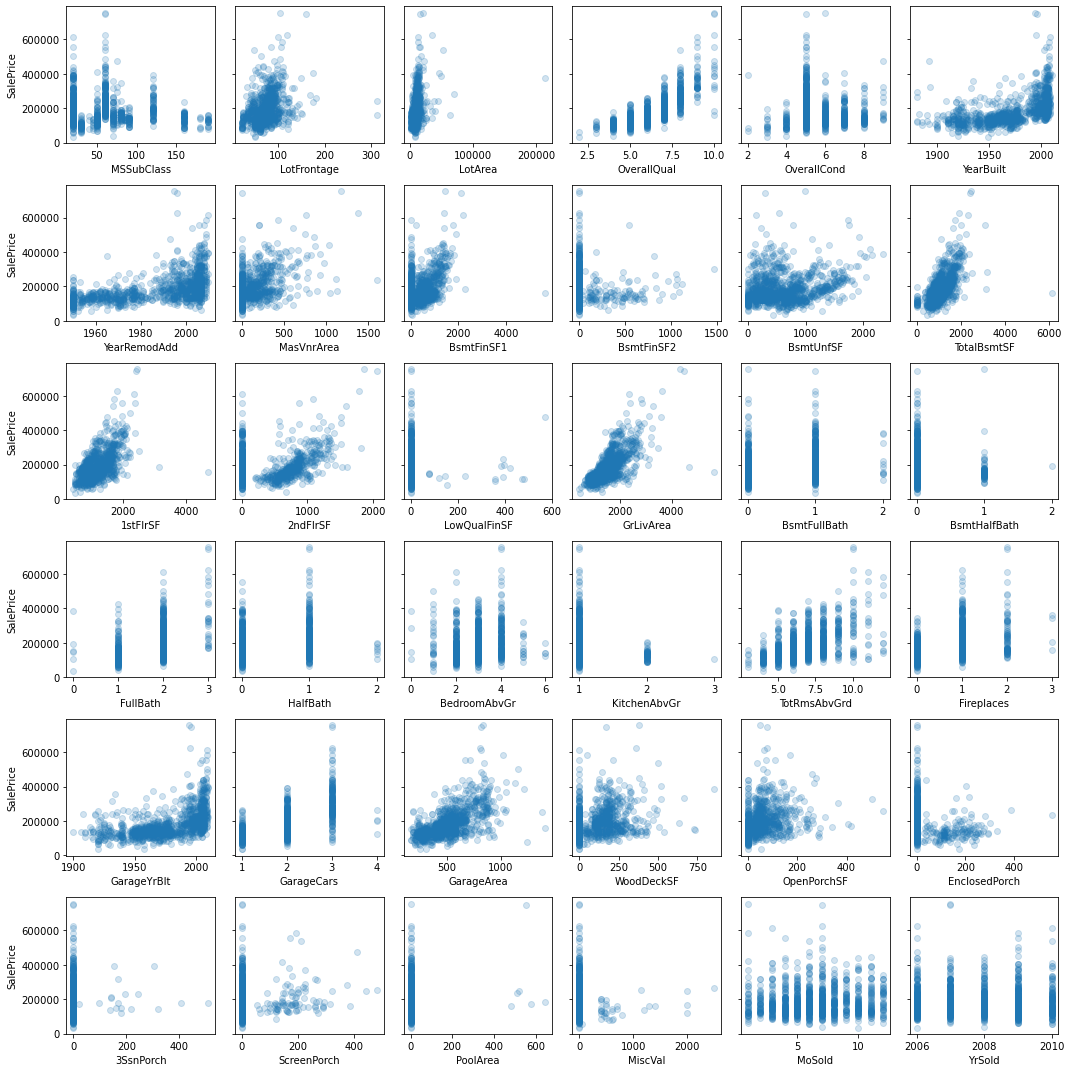

In [2]:
# Run this cell without changes
import matplotlib.pyplot as plt
import numpy as np

y = ames["SalePrice"]
X = ames.drop("SalePrice", axis=1)

fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(15,15), sharey=True)

for i, column in enumerate(X.columns):
    # Locate applicable axes
    row = i // 6
    col = i % 6
    ax = axes[row][col]
    
    # Plot feature vs. y and label axes
    ax.scatter(X[column], y, alpha=0.2)
    ax.set_xlabel(column)
    if col == 0:
        ax.set_ylabel("SalePrice")

fig.tight_layout()

Let's say we want to build a model with **at least one log-transformed feature** as well as a **log-transformed target**

Do you see any features that look like good candidates for this type of transformation?

For reference, a good candidate for this might look like any of these three graphs:

---

<div align="center"><div style="background-image: url('https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/Population_vs_area.svg/256px-Population_vs_area.svg.png'); height: 200px; width: 256px;"></div><a title="Skbkekas, CC BY-SA 3.0 &lt;http://creativecommons.org/licenses/by-sa/3.0/&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Population_vs_area.svg">Skbkekas, CC BY-SA 3.0, via Wikimedia Commons</a></div>

---

<div align="center"><img src="http://sciences.usca.edu/biology/zelmer/305/trans/y.jpg" width="256"/>
<a href="http://sciences.usca.edu/biology/zelmer/305/trans/">Derek Zelmer, UCSA</a></div>

---

![e^x](https://curriculum-content.s3.amazonaws.com/data-science/images/log_graphs.png)

Try to find one feature that resembles each of these shapes.

Because this is real-world messy data, none of them are going to match perfectly, and that's ok!

In [ ]:
# Your written answer here
"LotFrontage"
"1stFlSF"
"GarageYrBlt"

### Plot Log Transformed Versions of Features

For each feature that you identified as a good candidate for log transformation, plot the feature vs. `SalePrice` as well as the log transformed feature vs. log transformed `SalePrice`.

In [7]:
ames.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

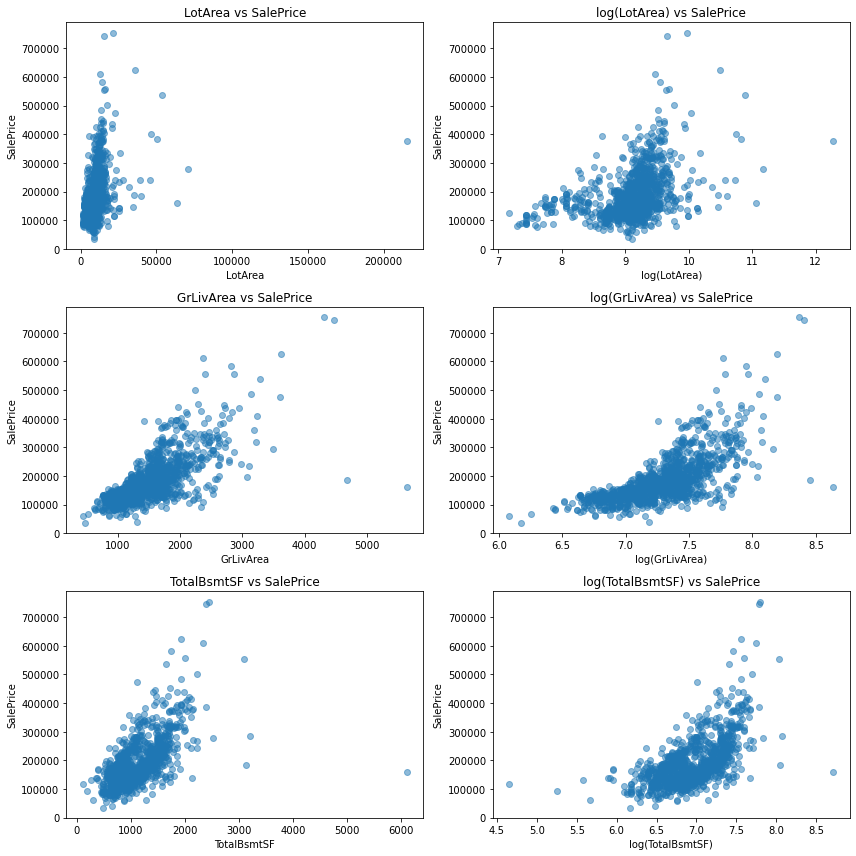

In [10]:
# Your code here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Select your x variables and y
X_raw = ames[["LotArea", "GrLivArea", "TotalBsmtSF"]]
y = ames["SalePrice"]

# Replace 0 or negative values with NaN to avoid issues with log
X_raw = X_raw.replace(0, np.nan)

# Apply log transformation
X_log = np.log(X_raw)

# Plot each raw and log-transformed variable vs SalePrice
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

for i, col in enumerate(X_raw.columns):
    axes[i, 0].scatter(X_raw[col], y, alpha=0.5)
    axes[i, 0].set_title(f"{col} vs SalePrice")
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel("SalePrice")

    axes[i, 1].scatter(X_log[col], y, alpha=0.5)
    axes[i, 1].set_title(f"log({col}) vs SalePrice")
    axes[i, 1].set_xlabel(f"log({col})")
    axes[i, 1].set_ylabel("SalePrice")

plt.tight_layout()
plt.show()


Do the transformed relationships look more linear? If so, they should be included in the model.

## Build a Model with Log-Transformed Features and Target

### Data Preparation

Choose up to 3 of the features you investigated, and set up an X dataframe containing the log-transformed versions of these features as well as a y series containing the log-transformed version of the target.

---

<details>
    <summary style="cursor: pointer"><b>Hint (click to reveal)</b></summary>

If you are planning log transform a feature measured in _years_ (e.g. `YearRemodAdd`) consider shifting the data first. For example, you might subtract 1900 or 1910 from the year, so that a 1% increase in year is closer to meaning 1 year rather than 20 years.

</details>

In [16]:
import numpy as np
import statsmodels.api as sm

# Select raw features and target
X_raw = ames[["LotArea", "GrLivArea", "TotalBsmtSF"]]
y = ames["SalePrice"]

# Replace 0s with np.nan to avoid log(0)
X_raw = X_raw.replace(0, np.nan)
y = y.replace(0, np.nan)

# Drop any rows with missing values before log
df = pd.concat([X_raw, y], axis=1).dropna()

# Apply log transformation
X_log = np.log(df[["LotArea", "GrLivArea", "TotalBsmtSF"]])
y_log = np.log(df["SalePrice"])


### Modeling

Now build a StatsModels OLS model with a log-transformed target as well as log-transformed features.

In [17]:
# Your code here - build a model
# Build linear regression model
log_model = sm.OLS(endog=y_log, exog=sm.add_constant(X_log))
log_results = log_model.fit()

# View summary
print(log_results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     672.5
Date:                Thu, 29 May 2025   Prob (F-statistic):          1.30e-247
Time:                        22:20:42   Log-Likelihood:                 37.609
No. Observations:                1097   AIC:                            -67.22
Df Residuals:                    1093   BIC:                            -47.22
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.0055      0.185     21.623      

### Model Evaluation and Interpretation

How did the model perform? How might we interpret its coefficients? Create as many cells as needed.

In [ ]:
# Your code here - evaluate the model
"""
1. The model is statistically significant overall, with a very high F-statistic and a p-value near zero.
2. It explains about 64.9% of the variability in house prices (R-squared = 0.649), with a similar adjusted R-squared of 0.648.
3. All three predictors—LotArea, GrLivArea, and TotalBsmtSF—are statistically significant with p-values less than 0.001.
4. In this log-log model, a 1% increase in GrLivArea leads to a 0.67% increase in SalePrice, making it the strongest predictor.
5. LotArea and TotalBsmtSF also have positive effects, increasing SalePrice by 0.049% and 0.393% respectively for every 1% increase.

"""

## Summary

Now you have practiced modeling with log transformations! This is a subtle, messy process, so don't be discouraged if this was a tricky lab.